In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
%pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.9 MB 4.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.9 MB 4.4 MB/s eta 0:00:02
   ----------- ---------------------------- 2.6/8.9 MB 4.4 MB/s eta 0:00:02
   --------------- ------------------------ 3.4/8.9 MB 4.5 MB/s eta 0:00:02
   ------------------ --------------------- 4.2/8.9 MB 4.4 MB/s eta 0:00:02
   ----------------------- ---------------- 5.2/8.9 MB 4.5 MB/s eta 0:00:01
   ---------------------------- ----------- 6.3/8.9 MB 4.5 MB/s eta 0:00:01
   ------------------------------- -------- 7.1/8.9 MB 4.5 MB/s eta 0:00:01
   ----------------------------------- ---- 7.9/8.9 MB 4.3 MB/s eta 0:00:01
   -------------------------------------- - 8.7/8.9 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 4.0 MB/s eta 0:00:00
Using cached threadpoolctl


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("D:/HP/downloadS/titanik/Titanic-Dataset.csv")
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

In [9]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [10]:
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# If Fare is missing (only in test data), fill with median
if 'Fare' in df.columns:
    df['Fare'].fillna(df['Fare'].median(), inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_14208\2683662290.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14208\2683662290.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [11]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [12]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
# Encode 'Sex' (male=0, female=1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [16]:
# One-hot encode 'Embarked' → Keep ALL 3 columns: C, Q, S
df = pd.get_dummies(df, columns=['Embarked'], drop_first=False)
print(df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    0  22.0      1      0   7.2500       False       False   
1         1       1    1  38.0      1      0  71.2833        True       False   
2         1       3    1  26.0      0      0   7.9250       False       False   
3         1       1    1  35.0      1      0  53.1000       False       False   
4         0       3    0  35.0      0      0   8.0500       False       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [17]:
scaler = StandardScaler()

# Scale Age and Fare
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

print(df.head())

   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_C  \
0         0       3    0 -0.565736      1      0 -0.502445       False   
1         1       1    1  0.663861      1      0  0.786845        True   
2         1       3    1 -0.258337      0      0 -0.488854       False   
3         1       1    1  0.433312      1      0  0.420730       False   
4         0       3    0  0.433312      0      0 -0.486337       False   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


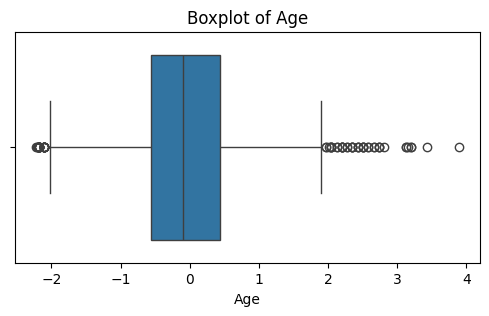

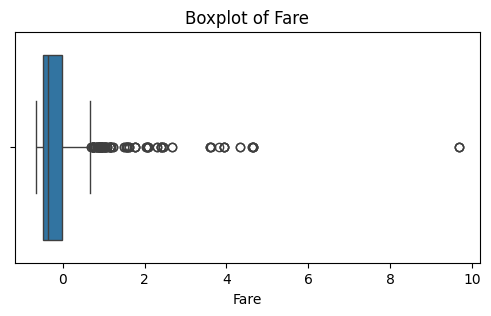

In [18]:
# Visualize boxplots
for col in ['Age', 'Fare']:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Remove outliers using IQR
for col in ['Age', 'Fare']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]



In [15]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
